<a href="https://colab.research.google.com/github/AnilNITT/My-Colab-Work/blob/master/Africa_Soil_Property_Prediction_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!pip install --upgrade tensorflow==2.0

Requirement already up-to-date: tensorflow==2.0 in /usr/local/lib/python3.6/dist-packages (2.0.0)


## Import the libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
import tensorflow as tf
tf.__version__

'2.0.0'

## Import the data

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
train_df=pd.read_csv("/content/drive/My Drive/DataSet/Africa Soil Property Prediction Challenge/train/training.csv")
train_df.head()

,PIDN,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,m7480.61,m7478.68,m7476.75,m7474.82,m7472.89,m7470.97,m7469.04,m7467.11,m7465.18,m7463.25,m7461.32,m7459.39,m7457.47,m7455.54,m7453.61,m7451.68,m7449.75,m7447.82,m7445.89,m7443.97,m7442.04,m7440.11,m7438.18,m7436.25,m7434.32,m7432.4,m7430.47,m7428.54,m7426.61,m7424.68,...,m634.473,m632.544,m630.616,m628.687,m626.759,m624.83,m622.902,m620.973,m619.045,m617.116,m615.188,m613.259,m611.331,m609.402,m607.474,m605.545,m603.617,m601.688,m599.76,BSAN,BSAS,BSAV,CTI,ELEV,EVI,LSTD,LSTN,REF1,REF2,REF3,REF7,RELI,TMAP,TMFI,Depth,Ca,P,pH,SOC,Sand
0,XNhoFZW5,0.302553,0.301137,0.299748,0.300354,0.302679,0.303799,0.301702,0.298936,0.298126,0.298120,0.298163,0.299124,0.300828,0.302522,0.303633,0.303364,0.302018,0.301226,0.300803,0.299270,0.297354,0.296703,0.297569,0.298991,0.299680,0.299230,0.298567,0.298865,0.299278,0.298186,0.296781,0.296565,0.296190,0.294805,0.293779,0.293980,0.295162,0.297448,0.300198,...,1.91489,1.91967,1.91974,1.91909,1.92077,1.91855,1.90573,1.88994,1.87770,1.86431,1.84816,1.83288,1.81858,1.80247,1.78462,1.76644,1.75086,1.74335,1.74246,-0.630435,-0.700000,-0.783875,-0.364146,1.165479,1.062682,-0.716713,-0.090016,-0.861091,-0.537106,-0.722567,-0.646673,1.687734,0.190708,0.056843,Topsoil,-0.295749,-0.041336,-1.129366,0.353258,1.269748
1,9XNspFTd,0.270192,0.268555,0.266964,0.267938,0.271013,0.272346,0.269870,0.266976,0.266544,0.266766,0.266464,0.266817,0.268150,0.269933,0.271409,0.271396,0.270126,0.269351,0.268984,0.267680,0.265901,0.265088,0.265679,0.266744,0.267202,0.266808,0.266266,0.266768,0.267507,0.266740,0.265624,0.265355,0.264461,0.262806,0.262251,0.263087,0.264431,0.266533,0.269126,...,2.00603,2.00192,2.00225,2.00244,1.99688,1.98540,1.96969,1.94942,1.92816,1.91071,1.89728,1.88298,1.86131,1.83355,1.80581,1.78410,1.77195,1.76479,1.75437,-0.630435,-0.700000,-0.783875,-0.364146,1.165479,1.062682,-0.716713,-0.090016,-0.861091,-0.537106,-0.722567,-0.646673,1.687734,0.190708,0.056843,Subsoil,-0.387442,-0.231552,-1.531538,-0.264023,1.692209
2,WDId41qG,0.317433,0.316265,0.314948,0.315224,0.316942,0.317764,0.316067,0.313874,0.313301,0.313296,0.313051,0.313306,0.314301,0.315640,0.316764,0.316759,0.315631,0.314860,0.314275,0.312711,0.311094,0.310565,0.311120,0.312103,0.312638,0.312326,0.311623,0.311752,0.312137,0.311122,0.309909,0.309824,0.309471,0.308209,0.307262,0.307201,0.307804,0.309592,0.312165,...,1.79495,1.79606,1.79749,1.79798,1.79977,1.80183,1.80012,1.79366,1.78411,1.77356,1.76544,1.76124,1.75742,1.75113,1.74128,1.72894,1.71991,1.71562,1.71158,-0.753623,-0.836364,-0.929451,-0.633972,1.544098,1.156705,-1.282552,-0.088336,-0.935273,-0.631725,-0.832298,-0.814516,1.806660,0.190708,0.056843,Topsoil,-0.248601,-0.224635,-0.259551,0.064152,2.091835
3,JrrJf1mN,0.261116,0.259767,0.258384,0.259001,0.261310,0.262417,0.260534,0.258039,0.257246,0.257124,0.257018,0.257568,0.258724,0.260107,0.261175,0.261028,0.259906,0.259251,0.258669,0.257007,0.255397,0.255119,0.256042,0.257195,0.257301,0.256440,0.256007,0.256729,0.257216,0.256001,0.254599,0.254345,0.253791,0.252452,0.251695,0.252027,0.253043,0.254901,0.257175,...,1.75317,1.76090,1.76944,1.77287,1.77080,1.76396,1.75453,1.74775,1.74264,1.73527,1.72770,1.72349,1.72149,1.71630,1.70737,1.69952,1.69356,1.68812,1.68178,-0.753623,-0.836364,-0.929451,-0.633972,1.544098,1.156705,-1.282552,-0.088336,-0.935273,-0.631725,-0.832298,-0.814516,1.806660,0.190708,0.056843,Subsoil,-0.332195,-0.318014,-0.577548,-0.318719,2.118477
4,ZoIitegA,0.260038,0.258425,0.256544,0.257030,0.259602,0.260786,0.258717,0.256352,0.255902,0.255822,0.255720,0.256521,0.257968,0.259571,0.260714,0.260465,0.259352,0.258872,0.258484,0.257105,0.255502,0.254720,0.255194,0.256394,0.257036,0.256583,0.255867,0.256101,0.256414,0.255297,0.254055,0.253889,0.253455,0.252198,0.251296,0.251400,0.252441,0.254763,0.257593,...,1.74973,1.75710,1.76209,1.76110,1.75564,1.75006,1.74568,1.74050,1.73201,1.72088,1.70944,1.69711,1.68257,1.66762,1.65639,1.64929,1.6

In [41]:
test_df=pd.read_csv("/content/drive/My Drive/DataSet/Africa Soil Property Prediction Challenge/test/sorted_test.csv")
test_df.head()

,PIDN,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,m7480.61,m7478.68,m7476.75,m7474.82,m7472.89,m7470.97,m7469.04,m7467.11,m7465.18,m7463.25,m7461.32,m7459.39,m7457.47,m7455.54,m7453.61,m7451.68,m7449.75,m7447.82,m7445.89,m7443.97,m7442.04,m7440.11,m7438.18,m7436.25,m7434.32,m7432.4,m7430.47,m7428.54,m7426.61,m7424.68,...,m644.115,m642.187,m640.258,m638.33,m636.401,m634.473,m632.544,m630.616,m628.687,m626.759,m624.83,m622.902,m620.973,m619.045,m617.116,m615.188,m613.259,m611.331,m609.402,m607.474,m605.545,m603.617,m601.688,m599.76,BSAN,BSAS,BSAV,CTI,ELEV,EVI,LSTD,LSTN,REF1,REF2,REF3,REF7,RELI,TMAP,TMFI,Depth
0,09gt9UK5,0.210899,0.209221,0.207645,0.208714,0.211972,0.213562,0.211267,0.208248,0.207341,0.207325,0.207134,0.207397,0.208380,0.209628,0.210512,0.210348,0.209535,0.209280,0.208996,0.207747,0.206380,0.205699,0.206026,0.207186,0.207923,0.207570,0.207033,0.207207,0.207376,0.206728,0.206293,0.206682,0.206746,0.206162,0.205879,0.206079,0.206431,0.207526,0.209079,...,1.78327,1.78770,1.79187,1.79703,1.80272,1.80728,1.81091,1.81313,1.81326,1.81205,1.80772,1.80108,1.79679,1.79400,1.78883,1.77971,1.76501,1.74416,1.72297,1.70793,1.69793,1.68849,1.67928,1.67214,-0.492754,-0.536364,-0.582307,0.006390,1.178842,0.396501,-0.009394,0.197885,-0.622545,-0.548238,-0.637681,-0.413306,-0.130139,0.154013,-0.033905,Subsoil
1,0BVvxJ6a,0.191650,0.184120,0.177070,0.180624,0.192343,0.197502,0.187655,0.175447,0.172639,0.172654,0.172667,0.176937,0.183838,0.191058,0.196595,0.195682,0.190070,0.187725,0.186047,0.178356,0.169748,0.167456,0.172100,0.178757,0.181010,0.178064,0.175260,0.177700,0.179517,0.173478,0.167653,0.167509,0.164808,0.158395,0.155371,0.157011,0.161760,0.172202,0.185020,...,1.76278,1.76169,1.76129,1.76146,1.75974,1.75726,1.75679,1.75552,1.74976,1.74141,1.73352,1.72488,1.71321,1.69916,1.68538,1.67153,1.65384,1.63312,1.61298,1.59357,1.57483,1.55778,1.54086,1.52211,-0.876812,-0.872727,-0.795073,3.596526,0.800223,0.137755,-0.277944,-0.851643,-0.792000,-1.058442,-0.792961,-0.785786,-0.588855,0.106200,0.559694,Subsoil
2,0KbdgApg,0.083966,0.074740,0.065596,0.069924,0.085145,0.092527,0.080625,0.064768,0.060597,0.060281,0.059938,0.065170,0.074122,0.083340,0.090274,0.089229,0.081904,0.078545,0.076999,0.068347,0.057907,0.054716,0.059902,0.067981,0.071091,0.067839,0.064419,0.066965,0.069103,0.062104,0.054964,0.054783,0.051977,0.044515,0.040940,0.043119,0.048688,0.060835,0.076638,...,1.60145,1.60562,1.60811,1.61030,1.61339,1.61620,1.61718,1.61650,1.61571,1.61432,1.60986,1.60262,1.59449,1.58653,1.57912,1.57244,1.56601,1.55716,1.54397,1.52886,1.51525,1.50377,1.49357,1.48399,-0.753623,-0.763636,-0.795073,-0.345725,1.443875,0.198251,-0.443809,-0.628839,-0.754909,-0.926716,-0.865424,-0.607359,-0.334013,-0.021042,0.182431,Topsoil
3,0MnuuduB,0.345962,0.338567,0.331786,0.336948,0.350820,0.356365,0.345285,0.332233,0.328589,0.328002,0.327858,0.331398,0.337977,0.344928,0.349030,0.346868,0.341866,0.341282,0.340623,0.333849,0.327131,0.325860,0.329239,0.333756,0.334847,0.332362,0.330537,0.332303,0.333406,0.329789,0.326837,0.327297,0.326009,0.322573,0.321130,0.322246,0.325189,0.332725,0.342152,...,1.82191,1.81394,1.80611,1.80100,1.79808,1.79468,1.78872,1.78167,1.77461,1.76563,1.75530,1.74464,1.73233,1.71977,1.70697,1.69077,1.67407,1.66029,1.64693,1.63284,1.61885,1.60411,1.58990,1.57980,-0.608696,-0.636364,-0.683091,-0.589106,1.800223,0.387755,-0.758853,-0.961080,-0.729455,-0.780148,-0.716356,-0.552923,-0.079171,0.394936,0.774477,Topsoil
4,0PcIsF9z,0.239019,0.232611,0.226266,0.229921,0.241821,0.247756,0.239242,0.227977,0.224762,0.224418,0.224282,0.227558,0.233453,0.239704,0.244165,0.243242,0.238470,0.236590,0.235728,0.230386,0.224626,0.223447,0.226548,0.230855,0.232304,0.230389,0.228640,0.230123,0.231294,0.227628,0.223918,0.223745,0.222251,0.218525,0.216784,0.217825,0.220604,0.227401,0.236407,...,1.53592,1.53744,1.53896,1.54075,1.54153,1.54089,1.53960,1.53691,1.53428,1.53349,1.53298,1.53074,1.52597,1.51982,1.51389,1.50790,1.50109

In [42]:
train_df.columns

Index(['PIDN', 'm7497.96', 'm7496.04', 'm7494.11', 'm7492.18', 'm7490.25',
       'm7488.32', 'm7486.39', 'm7484.46', 'm7482.54',
       ...
       'REF7', 'RELI', 'TMAP', 'TMFI', 'Depth', 'Ca', 'P', 'pH', 'SOC',
       'Sand'],
      dtype='object', length=3600)

---
### we have to predict the soil property so we have to drop " SOC, pH, Ca, P, Sand " from the dataframe

In [43]:
y_train=train_df.filter(['Ca', 'P', 'pH', 'SOC',
       'Sand'],axis=1)
y_train.head()

,Ca,P,pH,SOC,Sand
0,-0.295749,-0.041336,-1.129366,0.353258,1.269748
1,-0.387442,-0.231552,-1.531538,-0.264023,1.692209
2,-0.248601,-0.224635,-0.259551,0.064152,2.091835
3,-0.332195,-0.318014,-0.577548,-0.318719,2.118477
4,-0.438350,-0.010210,-0.699135,-0.310905,2.164148


In [44]:
X_train=train_df.drop(['Ca', 'P', 'pH', 'SOC',
       'Sand'],axis=1)
X_train.head()

,PIDN,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,m7480.61,m7478.68,m7476.75,m7474.82,m7472.89,m7470.97,m7469.04,m7467.11,m7465.18,m7463.25,m7461.32,m7459.39,m7457.47,m7455.54,m7453.61,m7451.68,m7449.75,m7447.82,m7445.89,m7443.97,m7442.04,m7440.11,m7438.18,m7436.25,m7434.32,m7432.4,m7430.47,m7428.54,m7426.61,m7424.68,...,m644.115,m642.187,m640.258,m638.33,m636.401,m634.473,m632.544,m630.616,m628.687,m626.759,m624.83,m622.902,m620.973,m619.045,m617.116,m615.188,m613.259,m611.331,m609.402,m607.474,m605.545,m603.617,m601.688,m599.76,BSAN,BSAS,BSAV,CTI,ELEV,EVI,LSTD,LSTN,REF1,REF2,REF3,REF7,RELI,TMAP,TMFI,Depth
0,XNhoFZW5,0.302553,0.301137,0.299748,0.300354,0.302679,0.303799,0.301702,0.298936,0.298126,0.298120,0.298163,0.299124,0.300828,0.302522,0.303633,0.303364,0.302018,0.301226,0.300803,0.299270,0.297354,0.296703,0.297569,0.298991,0.299680,0.299230,0.298567,0.298865,0.299278,0.298186,0.296781,0.296565,0.296190,0.294805,0.293779,0.293980,0.295162,0.297448,0.300198,...,1.89804,1.90076,1.90175,1.90283,1.90753,1.91489,1.91967,1.91974,1.91909,1.92077,1.91855,1.90573,1.88994,1.87770,1.86431,1.84816,1.83288,1.81858,1.80247,1.78462,1.76644,1.75086,1.74335,1.74246,-0.630435,-0.700000,-0.783875,-0.364146,1.165479,1.062682,-0.716713,-0.090016,-0.861091,-0.537106,-0.722567,-0.646673,1.687734,0.190708,0.056843,Topsoil
1,9XNspFTd,0.270192,0.268555,0.266964,0.267938,0.271013,0.272346,0.269870,0.266976,0.266544,0.266766,0.266464,0.266817,0.268150,0.269933,0.271409,0.271396,0.270126,0.269351,0.268984,0.267680,0.265901,0.265088,0.265679,0.266744,0.267202,0.266808,0.266266,0.266768,0.267507,0.266740,0.265624,0.265355,0.264461,0.262806,0.262251,0.263087,0.264431,0.266533,0.269126,...,2.01016,2.01654,2.01916,2.01810,2.01296,2.00603,2.00192,2.00225,2.00244,1.99688,1.98540,1.96969,1.94942,1.92816,1.91071,1.89728,1.88298,1.86131,1.83355,1.80581,1.78410,1.77195,1.76479,1.75437,-0.630435,-0.700000,-0.783875,-0.364146,1.165479,1.062682,-0.716713,-0.090016,-0.861091,-0.537106,-0.722567,-0.646673,1.687734,0.190708,0.056843,Subsoil
2,WDId41qG,0.317433,0.316265,0.314948,0.315224,0.316942,0.317764,0.316067,0.313874,0.313301,0.313296,0.313051,0.313306,0.314301,0.315640,0.316764,0.316759,0.315631,0.314860,0.314275,0.312711,0.311094,0.310565,0.311120,0.312103,0.312638,0.312326,0.311623,0.311752,0.312137,0.311122,0.309909,0.309824,0.309471,0.308209,0.307262,0.307201,0.307804,0.309592,0.312165,...,1.76743,1.76931,1.77624,1.78654,1.79348,1.79495,1.79606,1.79749,1.79798,1.79977,1.80183,1.80012,1.79366,1.78411,1.77356,1.76544,1.76124,1.75742,1.75113,1.74128,1.72894,1.71991,1.71562,1.71158,-0.753623,-0.836364,-0.929451,-0.633972,1.544098,1.156705,-1.282552,-0.088336,-0.935273,-0.631725,-0.832298,-0.814516,1.806660,0.190708,0.056843,Topsoil
3,JrrJf1mN,0.261116,0.259767,0.258384,0.259001,0.261310,0.262417,0.260534,0.258039,0.257246,0.257124,0.257018,0.257568,0.258724,0.260107,0.261175,0.261028,0.259906,0.259251,0.258669,0.257007,0.255397,0.255119,0.256042,0.257195,0.257301,0.256440,0.256007,0.256729,0.257216,0.256001,0.254599,0.254345,0.253791,0.252452,0.251695,0.252027,0.253043,0.254901,0.257175,...,1.72814,1.73569,1.74288,1.74760,1.74986,1.75317,1.76090,1.76944,1.77287,1.77080,1.76396,1.75453,1.74775,1.74264,1.73527,1.72770,1.72349,1.72149,1.71630,1.70737,1.69952,1.69356,1.68812,1.68178,-0.753623,-0.836364,-0.929451,-0.633972,1.544098,1.156705,-1.282552,-0.088336,-0.935273,-0.631725,-0.832298,-0.814516,1.806660,0.190708,0.056843,Subsoil
4,ZoIitegA,0.260038,0.258425,0.256544,0.257030,0.259602,0.260786,0.258717,0.256352,0.255902,0.255822,0.255720,0.256521,0.257968,0.259571,0.260714,0.260465,0.259352,0.258872,0.258484,0.257105,0.255502,0.254720,0.255194,0.256394,0.257036,0.256583,0.255867,0.256101,0.256414,0.255297,0.254055,0.253889,0.253455,0.252198,0.251296,0.251400,0.252441,0.254763,0.257593,...,1.72754,1.73368,1.73726,1.73864,1.74285,1.74973,1.75710,1.76209,1.76110,1.75564,1.75006,1.74568,1.74050,1.73201,1.72088,1.70944,1.69711,1.

### Select the Soil property diffrently

In [0]:
SOC=y_train['SOC'].values
pH=y_train['pH'].values
Ca=y_train['Ca'].values
P=y_train['P'].values
Sand=y_train['Sand'].values

#### Count he depth of Soil

Topsoil    581
Subsoil    576
Name: Depth, dtype: int64


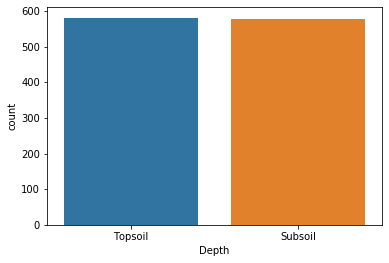

In [46]:
print(X_train['Depth'].value_counts())
sns.countplot(X_train['Depth'])

---
### Set Topsoil=0 and Subsoil=1

In [47]:
# "Depth" column is already a Object or string Data type
X_train=X_train.replace(['Topsoil','Subsoil'],[0,1])
X_train.head()

,PIDN,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,m7480.61,m7478.68,m7476.75,m7474.82,m7472.89,m7470.97,m7469.04,m7467.11,m7465.18,m7463.25,m7461.32,m7459.39,m7457.47,m7455.54,m7453.61,m7451.68,m7449.75,m7447.82,m7445.89,m7443.97,m7442.04,m7440.11,m7438.18,m7436.25,m7434.32,m7432.4,m7430.47,m7428.54,m7426.61,m7424.68,...,m644.115,m642.187,m640.258,m638.33,m636.401,m634.473,m632.544,m630.616,m628.687,m626.759,m624.83,m622.902,m620.973,m619.045,m617.116,m615.188,m613.259,m611.331,m609.402,m607.474,m605.545,m603.617,m601.688,m599.76,BSAN,BSAS,BSAV,CTI,ELEV,EVI,LSTD,LSTN,REF1,REF2,REF3,REF7,RELI,TMAP,TMFI,Depth
0,XNhoFZW5,0.302553,0.301137,0.299748,0.300354,0.302679,0.303799,0.301702,0.298936,0.298126,0.298120,0.298163,0.299124,0.300828,0.302522,0.303633,0.303364,0.302018,0.301226,0.300803,0.299270,0.297354,0.296703,0.297569,0.298991,0.299680,0.299230,0.298567,0.298865,0.299278,0.298186,0.296781,0.296565,0.296190,0.294805,0.293779,0.293980,0.295162,0.297448,0.300198,...,1.89804,1.90076,1.90175,1.90283,1.90753,1.91489,1.91967,1.91974,1.91909,1.92077,1.91855,1.90573,1.88994,1.87770,1.86431,1.84816,1.83288,1.81858,1.80247,1.78462,1.76644,1.75086,1.74335,1.74246,-0.630435,-0.700000,-0.783875,-0.364146,1.165479,1.062682,-0.716713,-0.090016,-0.861091,-0.537106,-0.722567,-0.646673,1.687734,0.190708,0.056843,0
1,9XNspFTd,0.270192,0.268555,0.266964,0.267938,0.271013,0.272346,0.269870,0.266976,0.266544,0.266766,0.266464,0.266817,0.268150,0.269933,0.271409,0.271396,0.270126,0.269351,0.268984,0.267680,0.265901,0.265088,0.265679,0.266744,0.267202,0.266808,0.266266,0.266768,0.267507,0.266740,0.265624,0.265355,0.264461,0.262806,0.262251,0.263087,0.264431,0.266533,0.269126,...,2.01016,2.01654,2.01916,2.01810,2.01296,2.00603,2.00192,2.00225,2.00244,1.99688,1.98540,1.96969,1.94942,1.92816,1.91071,1.89728,1.88298,1.86131,1.83355,1.80581,1.78410,1.77195,1.76479,1.75437,-0.630435,-0.700000,-0.783875,-0.364146,1.165479,1.062682,-0.716713,-0.090016,-0.861091,-0.537106,-0.722567,-0.646673,1.687734,0.190708,0.056843,1
2,WDId41qG,0.317433,0.316265,0.314948,0.315224,0.316942,0.317764,0.316067,0.313874,0.313301,0.313296,0.313051,0.313306,0.314301,0.315640,0.316764,0.316759,0.315631,0.314860,0.314275,0.312711,0.311094,0.310565,0.311120,0.312103,0.312638,0.312326,0.311623,0.311752,0.312137,0.311122,0.309909,0.309824,0.309471,0.308209,0.307262,0.307201,0.307804,0.309592,0.312165,...,1.76743,1.76931,1.77624,1.78654,1.79348,1.79495,1.79606,1.79749,1.79798,1.79977,1.80183,1.80012,1.79366,1.78411,1.77356,1.76544,1.76124,1.75742,1.75113,1.74128,1.72894,1.71991,1.71562,1.71158,-0.753623,-0.836364,-0.929451,-0.633972,1.544098,1.156705,-1.282552,-0.088336,-0.935273,-0.631725,-0.832298,-0.814516,1.806660,0.190708,0.056843,0
3,JrrJf1mN,0.261116,0.259767,0.258384,0.259001,0.261310,0.262417,0.260534,0.258039,0.257246,0.257124,0.257018,0.257568,0.258724,0.260107,0.261175,0.261028,0.259906,0.259251,0.258669,0.257007,0.255397,0.255119,0.256042,0.257195,0.257301,0.256440,0.256007,0.256729,0.257216,0.256001,0.254599,0.254345,0.253791,0.252452,0.251695,0.252027,0.253043,0.254901,0.257175,...,1.72814,1.73569,1.74288,1.74760,1.74986,1.75317,1.76090,1.76944,1.77287,1.77080,1.76396,1.75453,1.74775,1.74264,1.73527,1.72770,1.72349,1.72149,1.71630,1.70737,1.69952,1.69356,1.68812,1.68178,-0.753623,-0.836364,-0.929451,-0.633972,1.544098,1.156705,-1.282552,-0.088336,-0.935273,-0.631725,-0.832298,-0.814516,1.806660,0.190708,0.056843,1
4,ZoIitegA,0.260038,0.258425,0.256544,0.257030,0.259602,0.260786,0.258717,0.256352,0.255902,0.255822,0.255720,0.256521,0.257968,0.259571,0.260714,0.260465,0.259352,0.258872,0.258484,0.257105,0.255502,0.254720,0.255194,0.256394,0.257036,0.256583,0.255867,0.256101,0.256414,0.255297,0.254055,0.253889,0.253455,0.252198,0.251296,0.251400,0.252441,0.254763,0.257593,...,1.72754,1.73368,1.73726,1.73864,1.74285,1.74973,1.75710,1.76209,1.76110,1.75564,1.75006,1.74568,1.74050,1.73201,1.72088,1.70944,1.69711,1.68257,1.66762,1.65639,1.

In [48]:
test_df=test_df.replace(['Topsoil','Subsoil'],[0,1])
test_df.head()

,PIDN,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,m7480.61,m7478.68,m7476.75,m7474.82,m7472.89,m7470.97,m7469.04,m7467.11,m7465.18,m7463.25,m7461.32,m7459.39,m7457.47,m7455.54,m7453.61,m7451.68,m7449.75,m7447.82,m7445.89,m7443.97,m7442.04,m7440.11,m7438.18,m7436.25,m7434.32,m7432.4,m7430.47,m7428.54,m7426.61,m7424.68,...,m644.115,m642.187,m640.258,m638.33,m636.401,m634.473,m632.544,m630.616,m628.687,m626.759,m624.83,m622.902,m620.973,m619.045,m617.116,m615.188,m613.259,m611.331,m609.402,m607.474,m605.545,m603.617,m601.688,m599.76,BSAN,BSAS,BSAV,CTI,ELEV,EVI,LSTD,LSTN,REF1,REF2,REF3,REF7,RELI,TMAP,TMFI,Depth
0,09gt9UK5,0.210899,0.209221,0.207645,0.208714,0.211972,0.213562,0.211267,0.208248,0.207341,0.207325,0.207134,0.207397,0.208380,0.209628,0.210512,0.210348,0.209535,0.209280,0.208996,0.207747,0.206380,0.205699,0.206026,0.207186,0.207923,0.207570,0.207033,0.207207,0.207376,0.206728,0.206293,0.206682,0.206746,0.206162,0.205879,0.206079,0.206431,0.207526,0.209079,...,1.78327,1.78770,1.79187,1.79703,1.80272,1.80728,1.81091,1.81313,1.81326,1.81205,1.80772,1.80108,1.79679,1.79400,1.78883,1.77971,1.76501,1.74416,1.72297,1.70793,1.69793,1.68849,1.67928,1.67214,-0.492754,-0.536364,-0.582307,0.006390,1.178842,0.396501,-0.009394,0.197885,-0.622545,-0.548238,-0.637681,-0.413306,-0.130139,0.154013,-0.033905,1
1,0BVvxJ6a,0.191650,0.184120,0.177070,0.180624,0.192343,0.197502,0.187655,0.175447,0.172639,0.172654,0.172667,0.176937,0.183838,0.191058,0.196595,0.195682,0.190070,0.187725,0.186047,0.178356,0.169748,0.167456,0.172100,0.178757,0.181010,0.178064,0.175260,0.177700,0.179517,0.173478,0.167653,0.167509,0.164808,0.158395,0.155371,0.157011,0.161760,0.172202,0.185020,...,1.76278,1.76169,1.76129,1.76146,1.75974,1.75726,1.75679,1.75552,1.74976,1.74141,1.73352,1.72488,1.71321,1.69916,1.68538,1.67153,1.65384,1.63312,1.61298,1.59357,1.57483,1.55778,1.54086,1.52211,-0.876812,-0.872727,-0.795073,3.596526,0.800223,0.137755,-0.277944,-0.851643,-0.792000,-1.058442,-0.792961,-0.785786,-0.588855,0.106200,0.559694,1
2,0KbdgApg,0.083966,0.074740,0.065596,0.069924,0.085145,0.092527,0.080625,0.064768,0.060597,0.060281,0.059938,0.065170,0.074122,0.083340,0.090274,0.089229,0.081904,0.078545,0.076999,0.068347,0.057907,0.054716,0.059902,0.067981,0.071091,0.067839,0.064419,0.066965,0.069103,0.062104,0.054964,0.054783,0.051977,0.044515,0.040940,0.043119,0.048688,0.060835,0.076638,...,1.60145,1.60562,1.60811,1.61030,1.61339,1.61620,1.61718,1.61650,1.61571,1.61432,1.60986,1.60262,1.59449,1.58653,1.57912,1.57244,1.56601,1.55716,1.54397,1.52886,1.51525,1.50377,1.49357,1.48399,-0.753623,-0.763636,-0.795073,-0.345725,1.443875,0.198251,-0.443809,-0.628839,-0.754909,-0.926716,-0.865424,-0.607359,-0.334013,-0.021042,0.182431,0
3,0MnuuduB,0.345962,0.338567,0.331786,0.336948,0.350820,0.356365,0.345285,0.332233,0.328589,0.328002,0.327858,0.331398,0.337977,0.344928,0.349030,0.346868,0.341866,0.341282,0.340623,0.333849,0.327131,0.325860,0.329239,0.333756,0.334847,0.332362,0.330537,0.332303,0.333406,0.329789,0.326837,0.327297,0.326009,0.322573,0.321130,0.322246,0.325189,0.332725,0.342152,...,1.82191,1.81394,1.80611,1.80100,1.79808,1.79468,1.78872,1.78167,1.77461,1.76563,1.75530,1.74464,1.73233,1.71977,1.70697,1.69077,1.67407,1.66029,1.64693,1.63284,1.61885,1.60411,1.58990,1.57980,-0.608696,-0.636364,-0.683091,-0.589106,1.800223,0.387755,-0.758853,-0.961080,-0.729455,-0.780148,-0.716356,-0.552923,-0.079171,0.394936,0.774477,0
4,0PcIsF9z,0.239019,0.232611,0.226266,0.229921,0.241821,0.247756,0.239242,0.227977,0.224762,0.224418,0.224282,0.227558,0.233453,0.239704,0.244165,0.243242,0.238470,0.236590,0.235728,0.230386,0.224626,0.223447,0.226548,0.230855,0.232304,0.230389,0.228640,0.230123,0.231294,0.227628,0.223918,0.223745,0.222251,0.218525,0.216784,0.217825,0.220604,0.227401,0.236407,...,1.53592,1.53744,1.53896,1.54075,1.54153,1.54089,1.53960,1.53691,1.53428,1.53349,1.53298,1.53074,1.52597,1.51982,1.51389,1.50790,1.50109,1.49325,1.48464,1.47733

### Only Select Numeric Columns

In [0]:
numerics=['int16','int32','int64','float16','float32','float64']

X_train=X_train.select_dtypes(include=numerics)
X_test=test_df.select_dtypes(include=numerics)

---
## Normalize the data

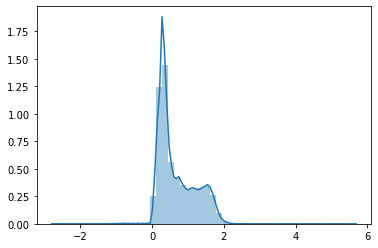

In [50]:
sns.distplot(X_train)

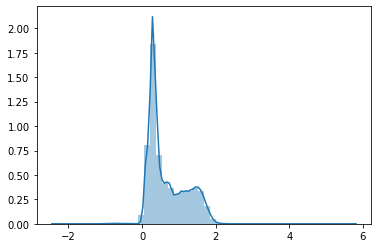

In [51]:
sns.distplot(X_test)

#### From the above graph you can see that this is not normal distribution graph so we have to go with " MinMax scaler" for this

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaled_X_train=MinMaxScaler().fit_transform(X_train)
scaled_X_test=MinMaxScaler().fit_transform(X_test)

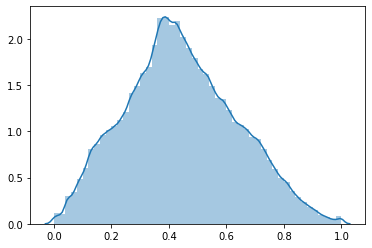

In [53]:
sns.distplot(scaled_X_train)

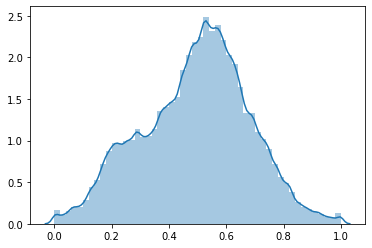

In [54]:
sns.distplot(scaled_X_test)

### you can see that out data is Normalize between one scaler means between 0 to 1

---
## Define the Model
### one hidden layer network of layer=[3594,3594,1]
### epocs=10

In [55]:
scaled_X_train.shape   # bcoz we have 3594 colums so we taken same no of layers

(1157, 3594)

In [56]:
len(X_train.keys())

3594

In [0]:
from tensorflow.keras import layers,losses,optimizers,activations,models,utils
model=tf.keras.Sequential()
model.add(layers.Dense(units=3594,activation='relu',input_dim=3594))
# model.add(leyers.Dense(units=3594,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(units=3594,activation='relu'))
# model.add(layers.Dense(units=3594,activation='relu'))
model.add(layers.Dense(units=1,activation='linear'))

# OR

In [0]:
model=tf.keras.Sequential([layers.Dense(units=3592,activation='relu',input_shape=[len(X_train.keys())]),
                           layers.Dropout(0.25),
                           layers.Dense(3594,activation='relu'),
                           layers.Dense(1,activation='linear')])

In [0]:
# Compile the model
model.compile(loss='mse',optimizer='adam',metrics=['mae','mse'])

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 3592)              12913240  
_________________________________________________________________
dropout_3 (Dropout)          (None, 3592)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 3594)              12913242  
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 3595      
Total params: 25,830,077
Trainable params: 25,830,077
Non-trainable params: 0
_________________________________________________________________


## Fit Model to "SOC" and predict

In [61]:
model.fit(scaled_X_train,SOC,epochs=10)
SOC_pred=model.predict(scaled_X_test)

Train on 1157 samples
Epoch 1/10
1157/1157 [==============================] - 10s 9ms/sample - loss: 126.3316 - mae: 4.0696 - mse: 126.3316
Epoch 2/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.8238 - mae: 0.6076 - mse: 0.8238
Epoch 3/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.6657 - mae: 0.5489 - mse: 0.6657
Epoch 4/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.4441 - mae: 0.4449 - mse: 0.4441
Epoch 5/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.5053 - mae: 0.4825 - mse: 0.5053
Epoch 6/10
1157/1157 [==============================] - 10s 9ms/sample - loss: 0.8171 - mae: 0.6401 - mse: 0.8171
Epoch 7/10
1157/1157 [==============================] - 10s 9ms/sample - loss: 0.4088 - mae: 0.4180 - mse: 0.4088
Epoch 8/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.2571 - mae: 0.3391 - mse: 0.2571
Epoch 9/10
1157/1157 [==============================] - 10s 8m

## Fit the Model to "pH" and Predict

In [62]:
model.fit(scaled_X_train,pH,epochs=10)

pH_pred=model.predict(scaled_X_test)

Train on 1157 samples
Epoch 1/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.9516 - mae: 0.7479 - mse: 0.9516
Epoch 2/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.8315 - mae: 0.7135 - mse: 0.8315
Epoch 3/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.7574 - mae: 0.6891 - mse: 0.7574
Epoch 4/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.7522 - mae: 0.6773 - mse: 0.7522
Epoch 5/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.5812 - mae: 0.5991 - mse: 0.5812
Epoch 6/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.5229 - mae: 0.5669 - mse: 0.5229
Epoch 7/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.4734 - mae: 0.5325 - mse: 0.4734
Epoch 8/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.5047 - mae: 0.5608 - mse: 0.5047
Epoch 9/10
1157/1157 [==============================] - 10s 8ms/sa

## Fit model to "Ca" and Predict

In [63]:
model.fit(scaled_X_train,Ca,epochs=10)

Ca_pred=model.predict(scaled_X_test)

Train on 1157 samples
Epoch 1/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.5880 - mae: 0.4267 - mse: 0.5880
Epoch 2/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.3973 - mae: 0.3519 - mse: 0.3973
Epoch 3/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.3186 - mae: 0.3173 - mse: 0.3186
Epoch 4/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.2810 - mae: 0.3001 - mse: 0.2810
Epoch 5/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.3090 - mae: 0.3118 - mse: 0.3090
Epoch 6/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.3094 - mae: 0.3257 - mse: 0.3094
Epoch 7/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.2861 - mae: 0.3167 - mse: 0.2861
Epoch 8/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.3863 - mae: 0.3268 - mse: 0.3863
Epoch 9/10
1157/1157 [==============================] - 10s 8ms/sa

## Fit Model to "P" and Predict

In [64]:
model.fit(scaled_X_train,P,epochs=10)

P_pred=model.predict(scaled_X_test)

Train on 1157 samples
Epoch 1/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 1.1820 - mae: 0.5011 - mse: 1.1820
Epoch 2/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.9734 - mae: 0.3965 - mse: 0.9734
Epoch 3/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.9735 - mae: 0.4350 - mse: 0.9735
Epoch 4/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.9759 - mae: 0.4261 - mse: 0.9759
Epoch 5/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.9925 - mae: 0.4515 - mse: 0.9925
Epoch 6/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.9640 - mae: 0.4118 - mse: 0.9640
Epoch 7/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.9616 - mae: 0.4266 - mse: 0.9616
Epoch 8/10
1157/1157 [==============================] - 10s 9ms/sample - loss: 0.9528 - mae: 0.4085 - mse: 0.9528
Epoch 9/10
1157/1157 [==============================] - 10s 8ms/sa

## Fit Model to "Sand" and predict

In [65]:
model.fit(scaled_X_train,Sand,epochs=10)

Sand_pred=model.predict(scaled_X_test)

Train on 1157 samples
Epoch 1/10
1157/1157 [==============================] - 9s 8ms/sample - loss: 0.8537 - mae: 0.7693 - mse: 0.8537
Epoch 2/10
1157/1157 [==============================] - 9s 8ms/sample - loss: 0.5956 - mae: 0.6105 - mse: 0.5956
Epoch 3/10
1157/1157 [==============================] - 9s 8ms/sample - loss: 0.4359 - mae: 0.5170 - mse: 0.4359
Epoch 4/10
1157/1157 [==============================] - 9s 8ms/sample - loss: 0.4460 - mae: 0.5163 - mse: 0.4460
Epoch 5/10
1157/1157 [==============================] - 9s 8ms/sample - loss: 0.3579 - mae: 0.4501 - mse: 0.3579
Epoch 6/10
1157/1157 [==============================] - 9s 8ms/sample - loss: 0.3450 - mae: 0.4431 - mse: 0.3450
Epoch 7/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.3350 - mae: 0.4405 - mse: 0.3350
Epoch 8/10
1157/1157 [==============================] - 10s 8ms/sample - loss: 0.3438 - mae: 0.4430 - mse: 0.3438
Epoch 9/10
1157/1157 [==============================] - 10s 8ms/sample -

## Open the Sample_submission file to see in which format we have to Submit the data

In [66]:
sample=pd.read_csv("/content/drive/My Drive/DataSet/Africa Soil Property Prediction Challenge/sample_submission.csv")
sample.head()

,PIDN,Ca,P,pH,SOC,Sand
0,09gt9UK5,0,0,0,0,0
1,0BVvxJ6a,0,0,0,0,0
2,0KbdgApg,0,0,0,0,0
3,0MnuuduB,0,0,0,0,0
4,0PcIsF9z,0,0,0,0,0


### Now we have to make our Submission into this format

### So first we have Reshape out predictions

In [0]:
Ca_pred = Ca_pred.reshape([727,])
P_pred = P_pred.reshape([727,])
pH_pred = pH_pred.reshape([727,])
SOC_pred = SOC_pred.reshape([727,])
Sand_pred = Sand_pred.reshape([727,])

In [77]:
sample_submissions=pd.DataFrame({"PIDN":test_df['PIDN'],
                                 "Ca":Ca_pred,"P":P_pred,
                                 "pH":pH_pred,"SOC":SOC_pred,
                                 "Sand":Sand_pred})

sample_submissions

,PIDN,Ca,P,pH,SOC,Sand
0,09gt9UK5,-0.351718,-0.063786,-0.488693,-0.496268,0.047969
1,0BVvxJ6a,0.072693,0.051755,0.514663,-0.098421,-0.603894
2,0KbdgApg,-0.081497,-0.072988,-0.092413,0.720757,-0.533628
3,0MnuuduB,0.435027,0.337050,-0.157145,2.512092,-1.102834
4,0PcIsF9z,-0.365096,-0.066109,-0.934595,-0.076213,-0.038815
...,...,...,...,...,...,...
722,zYxNAkht,-0.299540,-0.131384,-0.187454,-0.517866,0.516472
723,zaWDBai3,-0.060577,0.223844,-0.348195,0.637049,0.857999
724,zg3u0Zsx,0.102286,0.251101,-0.168536,0.605905,-0.483004
725,zlwLfdsS,-0.141354,-0.068149,-1.067127,3.169219,-1.079213


### Save Submission as a CSV file

In [0]:
sample_submissions.to_csv("Sample_Submissions.csv")